# Typing Test Analysis

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Getting Data

In [5]:
!ls ../data

beatles.csv
central-park-raw.csv
snow-alta-1990-2017.csv
table_export.csv
typing.csv
vehicles.csv.zip


In [8]:
tests = pd.read_csv('../data/typing.csv')
tests

,TestID,Date,WPM,Accuracy,Keyboard
0,1,10/20/2020,91.0,97.38,NYM84
1,2,10/23/2020,83.0,93.24,KBD75
2,3,10/23/2020,82.0,91.61,KBD75
3,4,10/23/2020,87.0,92.50,KBD75
4,5,10/23/2020,86.0,94.40,KBD75
...,...,...,...,...,...
95,96,NaN,NaN,NaN,NaN
96,97,NaN,NaN,NaN,NaN
97,98,NaN,NaN,NaN,NaN
98,99,NaN,NaN,NaN,NaN


In [11]:
tests = pd.read_csv('../data/typing.csv', index_col=0)
# As seen above, there is already an index in the file
tests

,Date,WPM,Accuracy,Keyboard
TestID,,,,
1,10/20/2020,91.0,97.38,NYM84
2,10/23/2020,83.0,93.24,KBD75
3,10/23/2020,82.0,91.61,KBD75
4,10/23/2020,87.0,92.50,KBD75
5,10/23/2020,86.0,94.40,KBD75
...,...,...,...,...
96,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN


## Inspecting Data

In [12]:
tests.columns # Let's see what columns we have

Index(['Date', 'WPM', 'Accuracy', 'Keyboard'], dtype='object')

In [13]:
tests.dtypes # Let's see how Pandas loaded them
#Looks like date came in as an object
#Let's change our how we read our csv to parse the dates in the column

Date         object
WPM         float64
Accuracy    float64
Keyboard     object
dtype: object

In [37]:
tests = pd.read_csv('../data/typing.csv', parse_dates=['Date'])
tests.dtypes

TestID               int64
Date        datetime64[ns]
WPM                float64
Accuracy           float64
Keyboard            object
dtype: object

In [19]:
tests.dtypes

TestID               int64
Date        datetime64[ns]
WPM                float64
Accuracy           float64
Keyboard            object
dtype: object

In [21]:
tests.iloc[:,4].value_counts(dropna=False)
#Here we can see what kinds of values are in our keyboard column; index 4

NaN        73
NYM84      16
KBD75       9
Leopold     2
Name: Keyboard, dtype: int64

## Tweaking Data

In [40]:
tests = tests.assign(Keyboard=tests.Keyboard.astype('category'))
#convert the keyboard column to category

In [41]:
tests.dtypes

TestID               int64
Date        datetime64[ns]
WPM                float64
Accuracy           float64
Keyboard          category
dtype: object

In [43]:
tests = tests[tests['Date'].isna().cumsum() == 0]
tests
#Get rid of all those extra rows because of my index/ID mistake

,TestID,Date,WPM,Accuracy,Keyboard
0,1,2020-10-20,91.0,97.38,NYM84
1,2,2020-10-23,83.0,93.24,KBD75
2,3,2020-10-23,82.0,91.61,KBD75
3,4,2020-10-23,87.0,92.50,KBD75
4,5,2020-10-23,86.0,94.40,KBD75
5,6,2020-10-23,82.0,91.33,KBD75
6,7,2020-10-23,77.0,94.00,KBD75
7,8,2020-10-27,96.0,96.00,NYM84
8,9,2020-10-27,76.0,98.00,NYM84
9,10,2020-10-27,89.0,98.00,NYM84


## Stats

In [44]:
tests.describe()

,TestID,WPM,Accuracy
count,27.000000,27.000000,27.000000
mean,14.000000,86.111111,94.762593
std,7.937254,6.979824,2.383508
min,1.000000,76.000000,88.280000
25%,7.500000,82.000000,93.620000
50%,14.000000,85.000000,95.020000
75%,20.500000,88.500000,96.765000
max,27.000000,105.000000,98.000000


In [45]:
tests.describe(include='all') # include some stats on Keyboard

<ipython-input-45-9acde3d4edac>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tests.describe(include='all')


,TestID,Date,WPM,Accuracy,Keyboard
count,27.000000,27,27.000000,27.000000,27
unique,NaN,14,NaN,NaN,3
top,NaN,2020-10-23 00:00:00,NaN,NaN,NYM84
freq,NaN,6,NaN,NaN,16
first,NaN,2020-10-20 00:00:00,NaN,NaN,NaN
last,NaN,2021-04-14 00:00:00,NaN,NaN,NaN
mean,14.000000,NaN,86.111111,94.762593,NaN
std,7.937254,NaN,6.979824,2.383508,NaN
min,1.000000,NaN,76.000000,88.280000,NaN
25%,7.500000,NaN,82.000000,93.620000,NaN


In [46]:
tests.WPM.corr(tests.Accuracy) # See if WPM and Accuracy are correlated

0.4960191993054471

## Plotting


<AxesSubplot:>

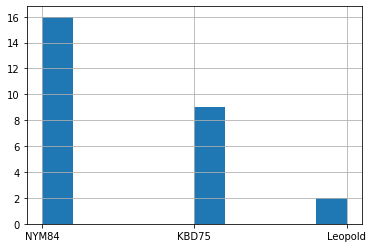

In [48]:
tests.Keyboard.hist() # which keyboards do I use the most?

<AxesSubplot:>

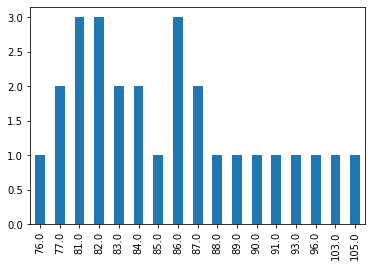

In [50]:
tests.WPM.value_counts().sort_index().plot.bar() # WPM freq distribution

<AxesSubplot:>

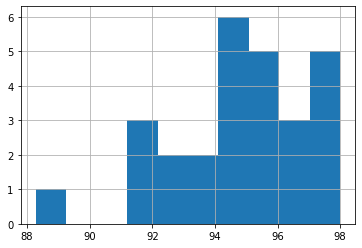

In [51]:
tests.Accuracy.hist() 

<AxesSubplot:>

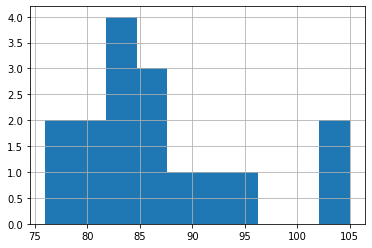

In [52]:
(tests
 .WPM
 .where(tests.Keyboard == 'NYM84')
 .hist()
)
# plot WPM frequency distribution for just the NYM84 keyboard

In [53]:
tests # sanity check

,TestID,Date,WPM,Accuracy,Keyboard
0,1,2020-10-20,91.0,97.38,NYM84
1,2,2020-10-23,83.0,93.24,KBD75
2,3,2020-10-23,82.0,91.61,KBD75
3,4,2020-10-23,87.0,92.50,KBD75
4,5,2020-10-23,86.0,94.40,KBD75
5,6,2020-10-23,82.0,91.33,KBD75
6,7,2020-10-23,77.0,94.00,KBD75
7,8,2020-10-27,96.0,96.00,NYM84
8,9,2020-10-27,76.0,98.00,NYM84
9,10,2020-10-27,89.0,98.00,NYM84


<AxesSubplot:ylabel='Keyboard'>

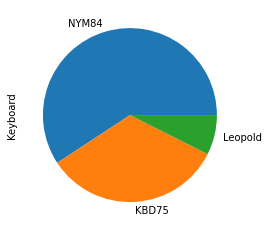

In [54]:
#Pie Chart
(
tests
 .Keyboard
 .value_counts()
 .plot.pie()
)

<AxesSubplot:xlabel='Date'>

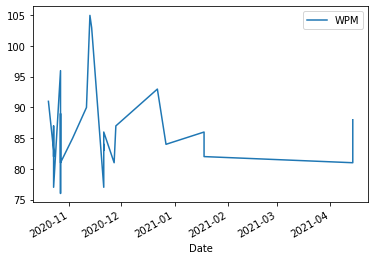

In [55]:
tests.plot.line(x='Date', y='WPM')

<AxesSubplot:xlabel='Date'>

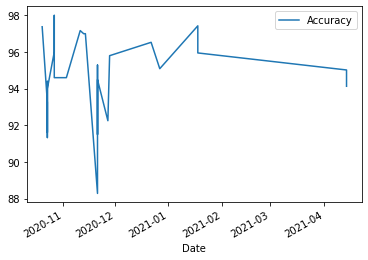

In [57]:
tests.plot.line(x='Date', y='Accuracy')

<AxesSubplot:xlabel='WPM', ylabel='Accuracy'>

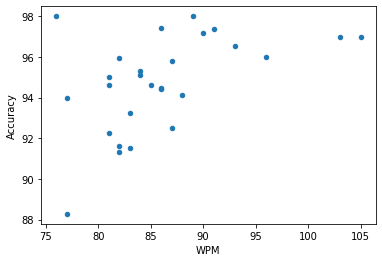

In [60]:
tests.plot.scatter(x='WPM', y='Accuracy')

## Grouping

In [62]:
tests.groupby('Keyboard').mean()

,TestID,WPM,Accuracy
Keyboard,,,
KBD75,9.555556,85.111111,94.245556
Leopold,26.500000,84.500000,94.575000
NYM84,14.937500,86.875000,95.076875


<AxesSubplot:xlabel='Date'>

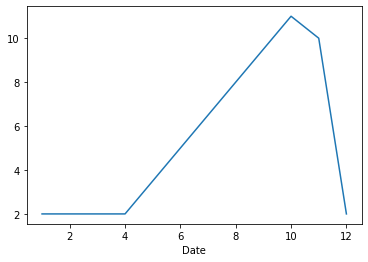

In [69]:
(tests
 .groupby(tests.Date.dt.month)
 .TestID
 .count()
 .plot()
)
#How many tests I took in each month

## Seaborn

<AxesSubplot:xlabel='Keyboard', ylabel='count'>

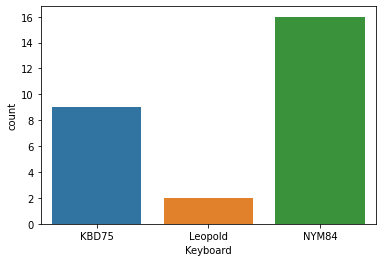

In [75]:
# 1D - Categorical ; Number of tests taken on each board
sns.countplot(x='Keyboard', data=tests)

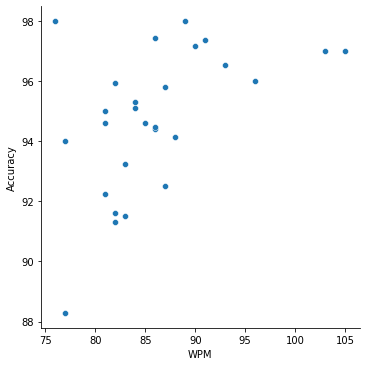

In [76]:
sns.relplot(x='WPM', y='Accuracy', data=tests)

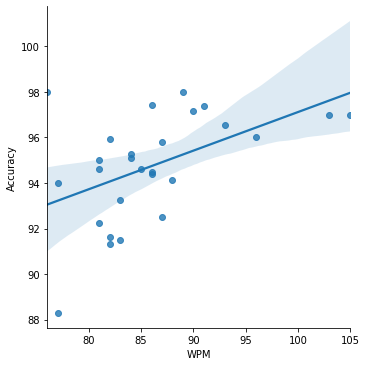

In [77]:
sns.lmplot(x='WPM', y='Accuracy', data=tests) # regression

<AxesSubplot:xlabel='Month'>

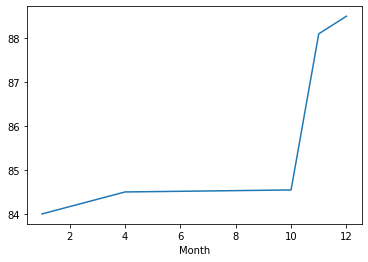

In [80]:
tests.groupby(tests.Date.dt.month)['WPM'].mean().plot(xlabel='Month')

<AxesSubplot:xlabel='Date', ylabel='WPM'>

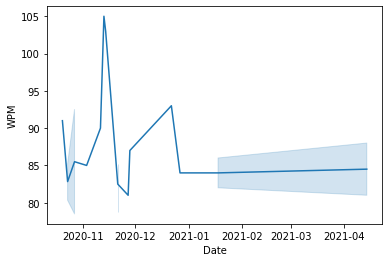

In [84]:
sns.lineplot(x='Date', y='WPM', data=tests)